<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/Overlap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
import tensorflow
import tensorflow.keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from keras.utils.vis_utils import plot_model

In [251]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DLdatasets/6.overlap.csv",header=None)

In [252]:
data.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


No null values

In [254]:
data.shape

(100, 3)

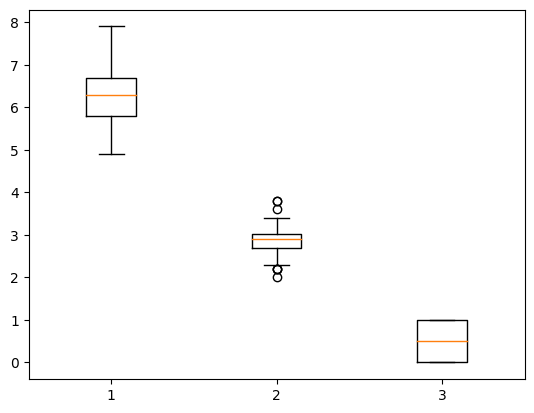

In [255]:
plt.boxplot(data)
plt.show()

There are some outliers in column 2 we can cap them

In [256]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [257]:
find_outliers_IQR(data[1])

10    2.0
12    2.2
18    2.2
59    3.6
67    3.8
69    2.2
81    3.8
Name: 1, dtype: float64

In [258]:
def cap_Outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    lowbound = q1 -(1.5*IQR)
    upbound = q3 +(1.5*IQR)
    df = df.apply(lambda x : lowbound if x < lowbound  else  upbound  if x > upbound else x)
    return df

In [259]:
data[1] = cap_Outliers(data[1])

In [260]:
find_outliers_IQR(data[1])

Series([], Name: 1, dtype: float64)

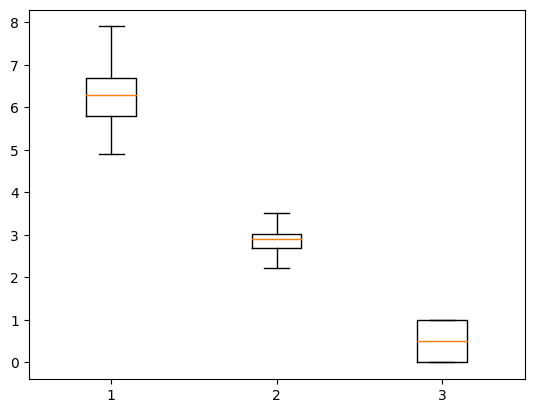

In [261]:
plt.boxplot(data)
plt.show()

Outliers have been capped

In [262]:
data[2].value_counts()

0    50
1    50
Name: 2, dtype: int64

balanced dataset

In [263]:
x = data[[0,1]]
y = data[2]

In [264]:
y = y.astype(int)

Output needs to be int for comparision with predicted output

> Indented block



In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [266]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((80, 2), (20, 2), 80, 20)

In [267]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

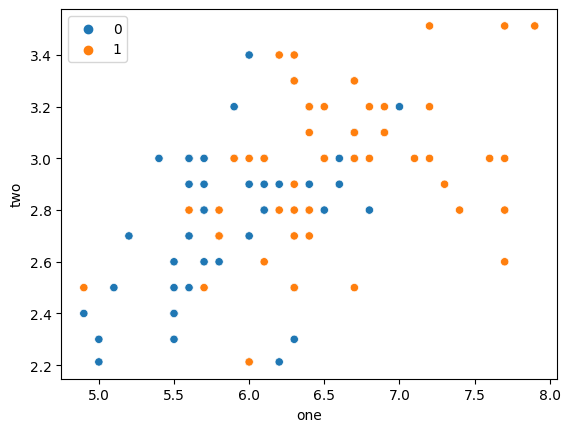

In [268]:
# code to visualize the data
data.columns = ["one","two","three"]
import seaborn as sns
sns.scatterplot(data=data, x="one",y="two",hue="three")
plt.legend()

In [269]:
model=Sequential()
model.add(Dense(11,activation="tanh",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

In [270]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 11)                33        
                                                                 
 dense_22 (Dense)            (None, 1)                 12        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


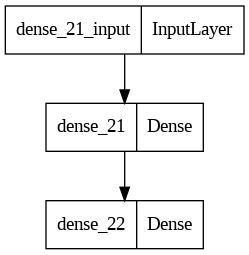

In [271]:
plot_model(model)

In [272]:
model.layers[0].get_weights()

[array([[ 0.14363605,  0.44791234, -0.04595059,  0.24061137, -0.56141096,
          0.42050517,  0.6726241 ,  0.4152106 , -0.12393987, -0.2919398 ,
         -0.09071231],
        [ 0.49865735,  0.6043639 , -0.43863437,  0.05353224, -0.02448195,
         -0.18845668, -0.12264621,  0.40814137, -0.31710222, -0.44177145,
          0.09741527]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [273]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [274]:
history = model.fit(x_train,y_train,batch_size=1,epochs=150,validation_split=0.2)

Epoch 1/150
64/64 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6562 - val_loss: 0.6043 - val_accuracy: 0.6875
Epoch 2/150
64/64 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7188 - val_loss: 0.5763 - val_accuracy: 0.5625
Epoch 3/150
64/64 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7188 - val_loss: 0.5574 - val_accuracy: 0.5625
Epoch 4/150
64/64 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7031 - val_loss: 0.5453 - val_accuracy: 0.6250
Epoch 5/150
64/64 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7188 - val_loss: 0.5368 - val_accuracy: 0.6250
Epoch 6/150
64/64 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7031 - val_loss: 0.5279 - val_accuracy: 0.6250
Epoch 7/150
64/64 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7031 - val_loss: 0.5242 - val_accuracy: 0.6250
Epoch 8/150
6

In [275]:
model.layers[0].get_weights()

[array([[-0.06620658,  0.33602157, -0.27800527,  0.34008563, -0.42491156,
          0.40259248,  0.62007546,  0.36443588, -0.30152723, -0.1862859 ,
         -0.2903843 ],
        [ 1.2957798 ,  0.40995494, -0.3198625 ,  0.13604116, -0.0825405 ,
         -0.07519117, -0.13391134,  0.35692537, -0.2821403 , -0.6372505 ,
         -0.0236152 ]], dtype=float32),
 array([ 0.2440158 , -0.32083672,  0.16296074,  0.08077476, -0.15794607,
         0.04134188,  0.01900587, -0.00308682,  0.08769153, -0.09504564,
        -0.02498062], dtype=float32)]

In [276]:
predict = np.where(model.predict(x_test)>0.5,1,0)

1/1 [==============================] - 0s 44ms/step


In [277]:
accuracy_score(y_test,predict)

0.6

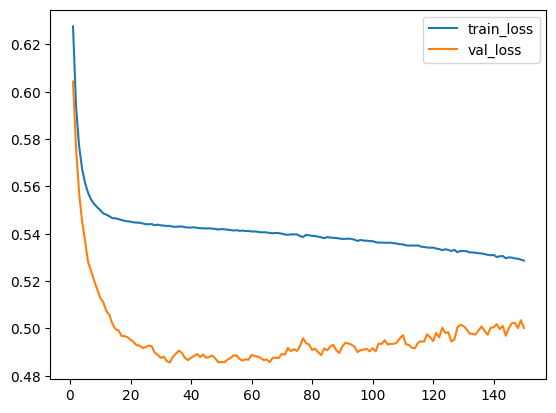

In [278]:
plt.plot(range(1,151),history.history["loss"],label="train_loss")
plt.plot(range(1,151),history.history["val_loss"],label="val_loss")
plt.legend()

9600/9600 [==============================] - 8s 855us/step


<Axes: >

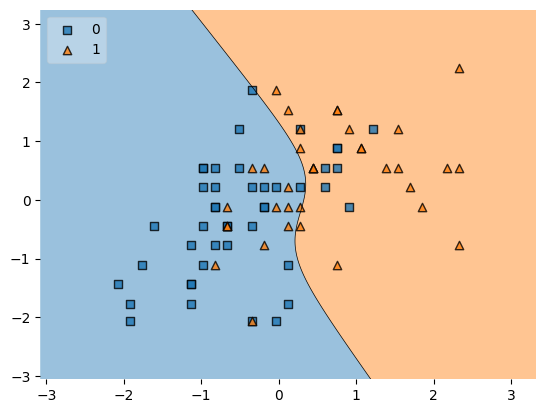

In [279]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

9600/9600 [==============================] - 8s 875us/step


<Axes: >

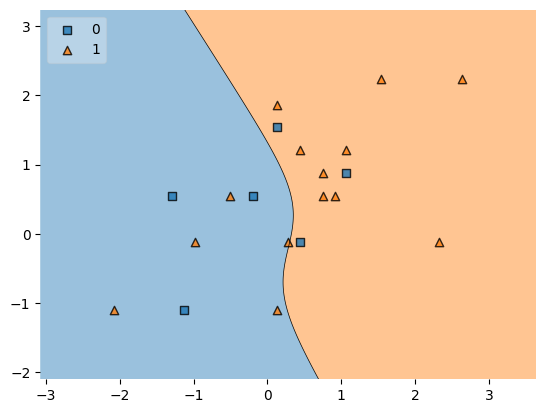

In [280]:
plot_decision_regions(x_test,y_test.values,clf=model,legend=2)